In [1]:
import pandas as pd
import numpy as np
from magi_module_Copy import get_report
import matplotlib.pyplot as plt
from datetime import datetime
from pykrx import stock
%matplotlib inline

In [2]:
"""pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)"""

## etf 종류 파악하기 (EDA)

In [3]:
etf_info = pd.read_csv('./../TIGER ETF기반 투자전략 개발 과제 다운로드/data/etf_info.csv', encoding = 'euc_kr')

In [4]:
etf_info.head()

,코드,펀드명,분류,벤치마크명,설정일
0,A377990,TIGER Fn신재생에너지,4.국내-전략,FnGuide 신재생에너지 지수,2021-03-04
1,A376410,TIGER 탄소효율그린뉴딜,03.국내-전략,KRX/S&P 탄소효율그린뉴딜지수,2021-02-04
2,A364960,TIGER KRX BBIG K-뉴딜,03.국내-전략,KRX BBIG K-뉴딜,2020-10-06
3,A364980,TIGER KRX2차전지K-뉴딜,03.국내-전략,KRX 2차전지 K-뉴딜 지수,2020-10-06
4,A364970,TIGER KRX바이오K-뉴딜,03.국내-전략,KRX 바이오 K-뉴딜 지수,2020-10-06


In [5]:
etf_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
코드       127 non-null object
펀드명      127 non-null object
분류       127 non-null object
벤치마크명    127 non-null object
설정일      127 non-null object
dtypes: object(5)
memory usage: 5.1+ KB


In [6]:
etf_info['분류'].value_counts()

03.국내-전략          28
02.국내-업종섹터        25
10.해외-시장대표        11
11.해외-업종섹터        10
17.해외-레버리지/인버스     9
01.국내-시장대표         8
14.해외-원자재          7
05.국내-채권           6
08.국내-레버리지/인버스     6
12.해외-전략           6
04.국내-규모           3
13.해외-채권           3
15.해외-부동산          1
09.국내-액티브          1
07.국내-혼합           1
4.국내-전략            1
18.해외-통화           1
Name: 분류, dtype: int64

In [7]:
etf_info['코드']

0      A377990
1      A376410
2      A364960
3      A364980
4      A364970
        ...   
122    A261120
123    A225030
124    A225060
125    A261110
126    A387270
Name: 코드, Length: 127, dtype: object

## pykrx패키지로 괴리율 구하기

In [8]:
etfcode = etf_info['코드'].astype('str')
list(etfcode)

['A377990',
 'A376410',
 'A364960',
 'A364980',
 'A364970',
 'A365000',
 'A364990',
 'A365040',
 'A315270',
 'A310970',
 'A310960',
 'A307510',
 'A307520',
 'A305540',
 'A300610',
 'A292150',
 'A292160',
 'A289260',
 'A289250',
 'A277630',
 'A277650',
 'A277640',
 'A261140',
 'A261060',
 'A261070',
 'A252000',
 'A232080',
 'A228820',
 'A228810',
 'A228790',
 'A228800',
 'A227540',
 'A227560',
 'A227550',
 'A227570',
 'A217790',
 'A211560',
 'A210780',
 'A174350',
 'A157490',
 'A157500',
 'A150460',
 'A147970',
 'A143860',
 'A139260',
 'A139280',
 'A139250',
 'A139270',
 'A139220',
 'A139230',
 'A139290',
 'A139240',
 'A138540',
 'A138530',
 'A138520',
 'A102110',
 'A098560',
 'A091230',
 'A091220',
 'A387270',
 'A387280',
 'A381170',
 'A381180',
 'A371160',
 'A371460',
 'A371470',
 'A371450',
 'A360750',
 'A357870',
 'A341850',
 'A329750',
 'A329200',
 'A319640',
 'A305080',
 'A302190',
 'A292560',
 'A289480',
 'A276000',
 'A275980',
 'A272580',
 'A269370',
 'A248270',
 'A248260',
 'A2

In [9]:
A = 'A'
etfnoA = []
for i in range(len(etfcode)):
    a = ''.join(x for x in etfcode[i] if x not in A)
    etfnoA.append(a)
etfnoA

['377990',
 '376410',
 '364960',
 '364980',
 '364970',
 '365000',
 '364990',
 '365040',
 '315270',
 '310970',
 '310960',
 '307510',
 '307520',
 '305540',
 '300610',
 '292150',
 '292160',
 '289260',
 '289250',
 '277630',
 '277650',
 '277640',
 '261140',
 '261060',
 '261070',
 '252000',
 '232080',
 '228820',
 '228810',
 '228790',
 '228800',
 '227540',
 '227560',
 '227550',
 '227570',
 '217790',
 '211560',
 '210780',
 '174350',
 '157490',
 '157500',
 '150460',
 '147970',
 '143860',
 '139260',
 '139280',
 '139250',
 '139270',
 '139220',
 '139230',
 '139290',
 '139240',
 '138540',
 '138530',
 '138520',
 '102110',
 '098560',
 '091230',
 '091220',
 '387270',
 '387280',
 '381170',
 '381180',
 '371160',
 '371460',
 '371470',
 '371450',
 '360750',
 '357870',
 '341850',
 '329750',
 '329200',
 '319640',
 '305080',
 '302190',
 '292560',
 '289480',
 '276000',
 '275980',
 '272580',
 '269370',
 '248270',
 '248260',
 '245340',
 '245350',
 '245360',
 '241180',
 '237440',
 '203780',
 '195930',
 '195920',

In [12]:
'''exa =['377990', '376410']
df = stock.get_etf_price_deviation("20060101", "20210531", '377990')
price_deviation_1 = df[['괴리율']].reset_index()
price_deviation_1'''

,날짜,괴리율
0,2021-03-05,-0.06
1,2021-03-08,-0.03
2,2021-03-09,-0.20
3,2021-03-10,-0.12
4,2021-03-11,-0.27
5,2021-03-12,-0.01
6,2021-03-15,-0.03
7,2021-03-16,-0.02
8,2021-03-17,-0.25
9,2021-03-18,-0.01


In [13]:
'''abc=['A377990', 'A376410']
df = stock.get_etf_price_deviation("20060101", "20210531", '376410')
price_deviation_2 = df[['괴리율']].reset_index()
price_deviation = pd.merge(price_deviation_1, price_deviation_2, how='outer', on='날짜', sort= True)
price_deviation.columns = ['날짜']+abc
print(price_deviation)'''

           날짜  A377990  A376410
0  2021-02-05      NaN    -0.03
1  2021-02-08      NaN    -0.01
2  2021-02-09      NaN    -0.01
3  2021-02-10      NaN    -0.02
4  2021-02-15      NaN    -0.09
5  2021-02-16      NaN    -0.00
6  2021-02-17      NaN    -0.07
7  2021-02-18      NaN     0.04
8  2021-02-19      NaN     0.02
9  2021-02-22      NaN    -0.04
10 2021-02-23      NaN    -0.04
11 2021-02-24      NaN    -0.09
12 2021-02-25      NaN    -0.40
13 2021-02-26      NaN    -0.02
14 2021-03-02      NaN    -0.07
15 2021-03-03      NaN    -0.50
16 2021-03-04      NaN    -0.05
17 2021-03-05    -0.06    -0.04
18 2021-03-08    -0.03    -0.05
19 2021-03-09    -0.20    -0.03
20 2021-03-10    -0.12    -0.13
21 2021-03-11    -0.27    -0.45
22 2021-03-12    -0.01    -0.34
23 2021-03-15    -0.03    -0.20
24 2021-03-16    -0.02    -0.20
25 2021-03-17    -0.25    -0.50
26 2021-03-18    -0.01    -0.42
27 2021-03-19     0.01    -0.19
28 2021-03-22    -0.04    -0.10
29 2021-03-23    -0.24    -0.22
30 2021-

In [14]:
"""for i in range(4):
    df = stock.get_etf_price_deviation("20060101", "20210531", etfnoA[i])
    price_deviation_i = df[['괴리율']].reset_index()
    price_deviation = pd.merge(price_deviation, price_deviation_i, how='outer', on='날짜', sort=True)
    print(price_deviation)"""

           날짜  A377990  A376410   괴리율
0  2021-02-05      NaN    -0.03   NaN
1  2021-02-08      NaN    -0.01   NaN
2  2021-02-09      NaN    -0.01   NaN
3  2021-02-10      NaN    -0.02   NaN
4  2021-02-15      NaN    -0.09   NaN
5  2021-02-16      NaN    -0.00   NaN
6  2021-02-17      NaN    -0.07   NaN
7  2021-02-18      NaN     0.04   NaN
8  2021-02-19      NaN     0.02   NaN
9  2021-02-22      NaN    -0.04   NaN
10 2021-02-23      NaN    -0.04   NaN
11 2021-02-24      NaN    -0.09   NaN
12 2021-02-25      NaN    -0.40   NaN
13 2021-02-26      NaN    -0.02   NaN
14 2021-03-02      NaN    -0.07   NaN
15 2021-03-03      NaN    -0.50   NaN
16 2021-03-04      NaN    -0.05   NaN
17 2021-03-05    -0.06    -0.04 -0.06
18 2021-03-08    -0.03    -0.05 -0.03
19 2021-03-09    -0.20    -0.03 -0.20
20 2021-03-10    -0.12    -0.13 -0.12
21 2021-03-11    -0.27    -0.45 -0.27
22 2021-03-12    -0.01    -0.34 -0.01
23 2021-03-15    -0.03    -0.20 -0.03
24 2021-03-16    -0.02    -0.20 -0.02
25 2021-03-1

            날짜  A377990  A376410  괴리율_x  괴리율_y  괴리율_x  괴리율_y
0   2020-10-07      NaN      NaN    NaN    NaN   0.10  -0.09
1   2020-10-08      NaN      NaN    NaN    NaN   0.40   0.43
2   2020-10-12      NaN      NaN    NaN    NaN   0.07  -0.14
3   2020-10-13      NaN      NaN    NaN    NaN   0.15  -0.29
4   2020-10-14      NaN      NaN    NaN    NaN   0.01  -0.17
5   2020-10-15      NaN      NaN    NaN    NaN   0.15  -0.08
6   2020-10-16      NaN      NaN    NaN    NaN   0.14  -0.11
7   2020-10-19      NaN      NaN    NaN    NaN   0.08   0.03
8   2020-10-20      NaN      NaN    NaN    NaN  -0.01  -0.01
9   2020-10-21      NaN      NaN    NaN    NaN   0.07  -0.41
10  2020-10-22      NaN      NaN    NaN    NaN  -0.03  -0.39
11  2020-10-23      NaN      NaN    NaN    NaN  -0.18  -0.07
12  2020-10-26      NaN      NaN    NaN    NaN  -0.09  -0.43
13  2020-10-27      NaN      NaN    NaN    NaN   0.05  -0.04
14  2020-10-28      NaN      NaN    NaN    NaN   0.02  -0.30
15  2020-10-29      NaN 

In [12]:
error = []
price_deviation = stock.get_etf_price_deviation("20060101", "20210531", etfnoA[0])[['괴리율']].reset_index()
for i in range(1,len(etfnoA)):
    try:
        df = stock.get_etf_price_deviation("20060101", "20210531", etfnoA[i])
        price_deviation_i = df[['괴리율']].reset_index()
        price_deviation = pd.merge(price_deviation, price_deviation_i, how='outer', on='날짜', sort=True)

    except:
        error.append(etfnoA[i])
        pass
price_deviation.columns = ['tdate']+ list(etfcode)
print(price_deviation)
print(error)


          tdate  A377990  A376410  A364960  A364980  A364970  A365000  \
0    2006-06-27      NaN      NaN      NaN      NaN      NaN      NaN   
1    2006-06-28      NaN      NaN      NaN      NaN      NaN      NaN   
2    2006-06-29      NaN      NaN      NaN      NaN      NaN      NaN   
3    2006-06-30      NaN      NaN      NaN      NaN      NaN      NaN   
4    2006-07-03      NaN      NaN      NaN      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
3684 2021-05-25    -0.13    -0.27    -0.46    -0.33    -0.41    -0.28   
3685 2021-05-26    -0.12    -0.32    -0.33    -0.22    -0.22    -0.32   
3686 2021-05-27    -0.25    -0.04    -0.17     0.08    -0.33    -0.25   
3687 2021-05-28     0.00    -0.05    -0.28    -0.20     0.01    -0.40   
3688 2021-05-31    -0.33    -0.13    -0.25    -0.08    -0.13    -0.30   

      A364990  A365040  A315270  ...  A204480  A225040  A217780  A236350  \
0         NaN      NaN      NaN  ...      NaN  

In [27]:
price_deviation = pd.concat([price_deviation[['tdate']], price_deviation[price_deviation.columns.difference(['tdate'])].mul(-1)], axis=1)

In [29]:
price_deviation.to_csv('./price_deviation.csv')

In [30]:
price_deviation['tdate']

0      2006-06-27
1      2006-06-28
2      2006-06-29
3      2006-06-30
4      2006-07-03
          ...    
3684   2021-05-25
3685   2021-05-26
3686   2021-05-27
3687   2021-05-28
3688   2021-05-31
Name: tdate, Length: 3689, dtype: datetime64[ns]

#### 스코어가 높다 = 괴리율이 높다 = (NAV < 현재가격) : ETF의 현재가격은 NAV를 따를 것이기 때문에 **가격하락** 예상. --> **매도해야**  
#### 스코어가 낮다 = 괴리율이 낮다 = (NAV > 현재가격) : ETF의 현재가격은 NAV를 따를 것이기 때문에 **가격상승** 예상. --> **매수해야**

#### 그래서 스코어에 - 붙이는 게 필요해보임..!

## 괴리율 전략 - Daily backtesting

In [31]:
price_deviation_index = price_deviation.set_index('tdate')

In [32]:
target_start_date = '2018-12-31'
target_end_date = '2021-05-31'

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.495067,0.780392,1.089306,2.408045,5.740783,11.390742,7.787428
MDD,-0.549509,-0.379263,-0.358452,-0.251164,-0.228985,-0.056929,-0.044282
TURNOVER,335.261793,393.001412,418.800929,423.663596,352.629552,687.891346,598.257211
CAGR,-0.208918,-0.079329,0.028924,0.340360,0.790566,1.250008,0.982126
SHARPE,-0.378778,-0.146892,0.067073,0.522087,0.897584,1.611337,1.736840


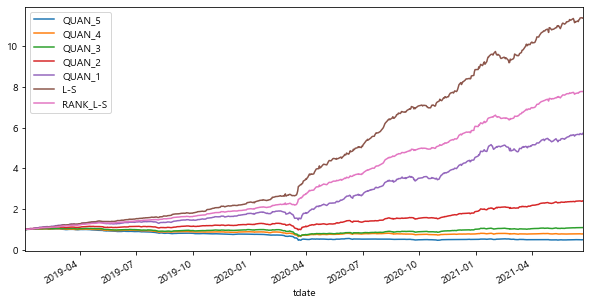

In [33]:
price_deviation_daily_score = price_deviation_index.loc[target_start_date : target_end_date]
daily_summary, daily_ress = get_report(price_deviation_daily_score)

daily_ress.plot(figsize = (10, 5))

daily_summary

## 괴리율 전략 - Weekly backtesting (종가기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.545645,1.513198,1.406962,1.312446,1.278161,0.793625,0.814278
MDD,-0.369919,-0.292909,-0.298053,-0.296176,-0.236370,-0.382452,-0.305594
TURNOVER,79.053239,90.956483,90.219181,86.371686,74.849769,153.903009,133.734431
CAGR,0.156210,0.148062,0.120540,0.094865,0.085247,-0.074155,-0.066192
SHARPE,0.234531,0.241864,0.213741,0.191020,0.175929,-0.136009,-0.167610


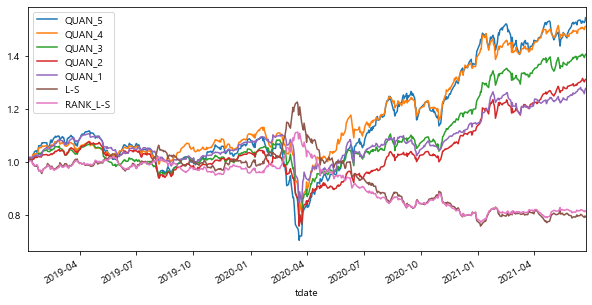

In [30]:
price_deviation_weekly_score = price_deviation_index.resample('W').last().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Weekly backtesting (평균가 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.738425,1.481770,1.225138,1.262188,1.374676,0.755050,0.775678
MDD,-0.329851,-0.325450,-0.329281,-0.275082,-0.246015,-0.359273,-0.313400
TURNOVER,66.629373,86.808965,88.411090,77.230776,62.898154,129.527527,106.640771
CAGR,0.202408,0.140058,0.070028,0.080707,0.111903,-0.089405,-0.081187
SHARPE,0.279620,0.222750,0.133075,0.185124,0.231545,-0.174833,-0.190010


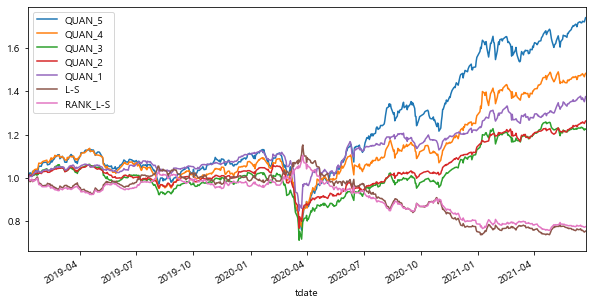

In [31]:
price_deviation_weekly_score = price_deviation_index.resample('W').mean().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Weekly backtesting (first 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.436318,1.476025,1.342234,1.424653,1.361363,0.921201,0.933752
MDD,-0.293241,-0.266953,-0.327389,-0.287265,-0.336491,-0.250378,-0.212132
TURNOVER,78.217908,88.813019,87.773496,85.234387,73.140012,151.357920,133.422882
CAGR,0.128280,0.138583,0.103086,0.125217,0.108302,-0.026988,-0.022589
SHARPE,0.202839,0.256715,0.186772,0.236051,0.193394,-0.043537,-0.049643


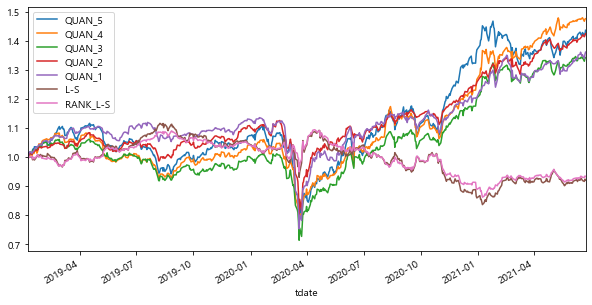

In [33]:
price_deviation_weekly_score = price_deviation_index.resample('W').first().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Weekly backtesting (min 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.548518,1.563066,1.394097,1.305218,1.262664,0.782792,0.807411
MDD,-0.354626,-0.321097,-0.318791,-0.300163,-0.231617,-0.324068,-0.247543
TURNOVER,57.214415,83.801215,86.930528,85.573593,62.208191,119.422606,101.101504
CAGR,0.156926,0.160537,0.117115,0.092851,0.080843,-0.078386,-0.068825
SHARPE,0.234339,0.264013,0.203109,0.185225,0.193253,-0.181298,-0.201677


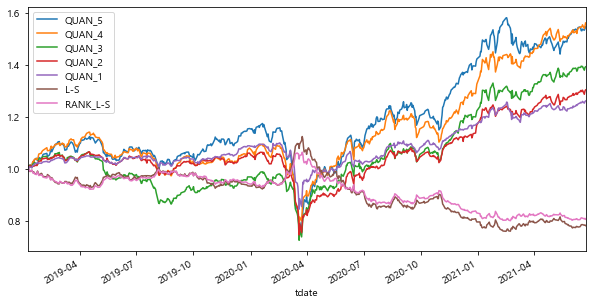

In [36]:
price_deviation_weekly_score = price_deviation_index.resample('W').min().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Monthly backtesting (종가기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.456719,1.560610,1.445085,1.357916,1.314317,0.865999,0.873420
MDD,-0.346854,-0.319585,-0.349288,-0.240014,-0.233471,-0.259713,-0.228384
TURNOVER,19.369708,22.644901,20.236176,22.188181,19.429045,38.798753,33.648598
CAGR,0.133597,0.159929,0.130571,0.107365,0.095385,-0.046826,-0.044110
SHARPE,0.205796,0.251997,0.213642,0.225486,0.213498,-0.090621,-0.116669


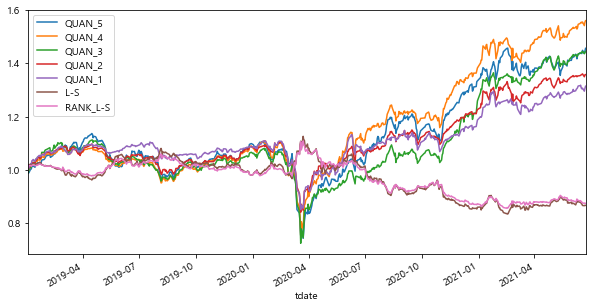

In [28]:
price_deviation_monthly_score = price_deviation_index.resample('M').last().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (평균가 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.709441,1.498568,1.506838,1.161427,1.284842,0.709226,0.719455
MDD,-0.350412,-0.387194,-0.272003,-0.243762,-0.240469,-0.373820,-0.379197
TURNOVER,13.721020,19.094010,19.976589,16.423921,12.005524,25.726543,19.847342
CAGR,0.195688,0.144350,0.146451,0.051148,0.087134,-0.108212,-0.103945
SHARPE,0.260266,0.198679,0.271544,0.135354,0.205187,-0.202276,-0.215119


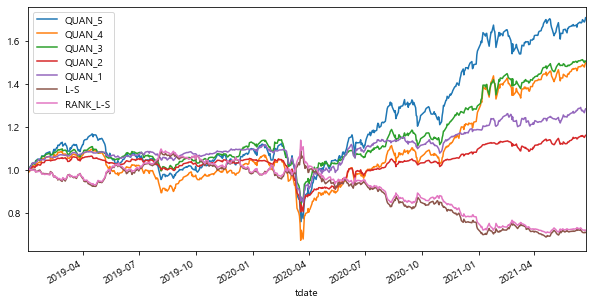

In [32]:
price_deviation_monthly_score = price_deviation_index.resample('M').mean().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (first 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.787955,1.585867,1.457465,1.078560,1.313595,0.711822,0.716519
MDD,-0.282545,-0.265972,-0.279621,-0.355261,-0.330374,-0.332560,-0.320471
TURNOVER,19.578447,20.947901,20.491129,20.818231,16.303251,35.881699,31.735256
CAGR,0.213721,0.166153,0.133790,0.025529,0.095184,-0.107126,-0.105166
SHARPE,0.312319,0.283659,0.239436,0.062387,0.183071,-0.231724,-0.310161


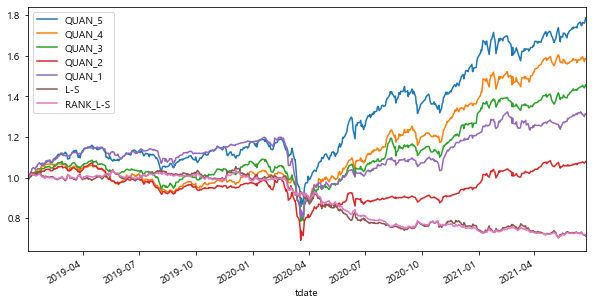

In [34]:
price_deviation_monthly_score = price_deviation_index.resample('M').first().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (min 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.531175,1.581175,1.471512,1.456181,1.141555,0.713795,0.790887
MDD,-0.305855,-0.325323,-0.346989,-0.298651,-0.222184,-0.322141,-0.227194
TURNOVER,11.039673,18.460242,19.388733,18.258723,11.253151,22.292824,17.987757
CAGR,0.152590,0.165002,0.137421,0.133457,0.045119,-0.106301,-0.075221
SHARPE,0.238070,0.258542,0.234082,0.223628,0.134701,-0.242507,-0.244021


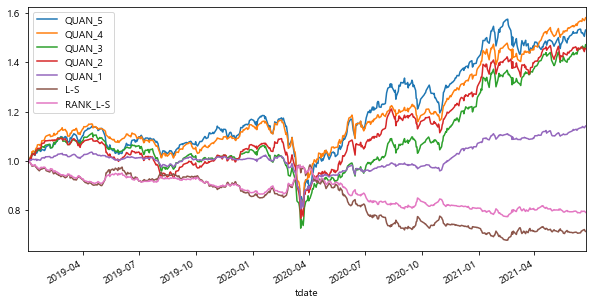

In [37]:
price_deviation_monthly_score = price_deviation_index.resample('M').min().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

# 여기서부터는 잘못 짠 코드... 나중을 위해 남겨놓음

## 전략을 위한 데이터 불러오기 및 형식 맞추기

(파일 5개)  
**etf_data_pivot** : 매일 etf의 거래량,고가,시가,저가, 종가  
**stock_data_pivot** : 매일 주식의 거래량, 고가,시가,저가,종가 + 시가총액, 거래정지여부  
**pdf_data_monthly** : 매달 각 etf를 구성하는 주식들의 비율   (2012년 데이터부터 존재)  
**ret_data** : 매일 etf의 수익률  
**stock_sector** : 매일 주식의 섹터

In [7]:
etf_data = pd.read_csv('./TIGER ETF기반 투자전략 개발 과제 다운로드/data/etf_data.csv', encoding = 'euc_kr', parse_dates= ['tdate'])

In [8]:
etf_data.head()

,tdate,etf_code,data_name,value
0,2012-01-02,A091220,거래량,5114
1,2012-01-02,A091220,고가,7240
2,2012-01-02,A091220,시가,7240
3,2012-01-02,A091220,저가,7055
4,2012-01-02,A091220,종가,7110


In [9]:
etf_data_pivot = etf_data.set_index(['tdate','etf_code',  'data_name'])['value'].unstack()
etf_data_pivot.head(40)

data_name               거래량      고가      시가      저가      종가
tdate      etf_code                                        
2012-01-02 A091220     5114    7240    7240    7055    7110
           A091230     8093   14895   14500   14500   14890
           A098560     7951    7855    7855    7710    7735
           A102110   165762   24300   24300   23930   24130
           A105010      195    5130    5130    4955    4955
           A114820       12  104870  104835  104835  104870
           A117690       26   10560   10525   10500   10560
           A123310   211813    8725    8640    8610    8645
           A123320   352563   10135   10045    9850   10010
           A130680    10252   10970   10970   10840   10845
           A133690       84   11570   11225   11225   11570
           A137610     3406    8990    8950    8950    8960
           A138520    11727    7745    7675    7665    7735
           A138530    35828    6100    6055    6035    6070
           A138540    10143   25920   25755   25405   25600
           A139220    13203    6175    6085    6085    6175
           A139230      211    5185    5185    5165    5175
           A139240    15173    9505    9505    9275    9305
           A139250     9451   11895   11820   11680   11825
           A139260     1549   11960   11720   11720   11885
           A139270    10120    6605    6605    6480    6530
           A139280       61    8610    8590    8465    8490
           A139290     5173   20230   20200   19875   19995
           A139310      144    7400    7360    7360    7380
           A139320      544   10070    9975    9975   10065
           A143850      103   12990   12990   12895   12990
           A143860     3202   13200   13105   12940   13165
           A147970     3689   18400   18400   18235   18335
           A150460    31677    5580    5520    5520    5580
2012-01-03 A091220     1979    7365    7180    7180    7365
           A091230      925   15135   15065   15065   15135
           A098560      207    7795    7735    7735    7750
           A102110   365936   24890   24300   24300   24890
           A105010       10    4995    4995    4995    4995
           A114820       17  104840  104805  104805  104820
           A117690     5787   10790   10695   10675   10785
           A123310   403713    8630    8630    8375    8375
           A123320   611170   10645   10115   10115   10635
           A130680     1826   11040   10970   10920   11040
           A133690     2482   11630   11630   11590   11590

In [10]:
type(etf_data_pivot.index[0][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
pdf_data_monthly = pd.read_csv('./TIGER ETF기반 투자전략 개발 과제 다운로드/data/pdf_data_monthly.csv', encoding = 'euc_kr', parse_dates= ['tdate'])

In [12]:
pdf_data_monthly.head()

,tdate,etf_code,stock_code,stock_name,ratio
0,2021-03-31,A377990,A006260,LS,0.091023
1,2021-03-31,A377990,A009830,한화솔루션,0.116892
2,2021-03-31,A377990,A010060,OCI,0.160506
3,2021-03-31,A377990,A011930,신성이엔지,0.045884
4,2021-03-31,A377990,A018000,유니슨,0.044053


In [10]:
ret_data = pd.read_csv('./TIGER ETF기반 투자전략 개발 과제 다운로드/data/ret_data.csv', encoding = 'euc_kr', parse_dates= ['tdate'])

In [11]:
ret_data.head()

,tdate,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,...,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
0,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-03,0.035865,0.016454,0.001939,0.031496,0.008073,-0.000477,0.021307,-0.031232,0.062438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-04,-0.019688,-0.001321,0.001290,-0.005826,0.021021,0.000191,-0.008809,0.006567,-0.010813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-05,-0.009695,-0.008932,-0.001933,-0.002223,0.005882,0.000572,0.001871,0.001186,-0.002852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-06,-0.013287,-0.000668,-0.019367,-0.014783,-0.003899,-0.000143,0.001401,0.014218,-0.029552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
stock_data = pd.read_csv('./TIGER ETF기반 투자전략 개발 과제 다운로드/data/stock_data.csv', encoding = 'euc_kr', parse_dates= ['tdate'])

In [16]:
stock_data_pivot = stock_data.set_index(['tdate', 'stock_code', 'data_name'])['value'].unstack()
stock_data_pivot.head()

data_name                    거래량  거래정지여부(1:정지, 0:정상)        고가        시가  \
tdate      stock_code                                                      
2006-01-02 A000020       29020.0                 0.0   18900.0   18700.0   
           A000040     4724552.0                 0.0     990.0     955.0   
           A000050        3350.0                 0.0  175000.0  158000.0   
           A000060       32350.0                 0.0   53700.0   53700.0   
           A000070       26941.0                 0.0   47000.0   45200.0   

data_name                      시가총액        저가        종가  
tdate      stock_code                                    
2006-01-02 A000020     1.041844e+11   18650.0   18650.0  
           A000040     1.008880e+11     955.0     980.0  
           A000050     3.640000e+11  158000.0  175000.0  
           A000060     4.504500e+11   51700.0   52500.0  
           A000070     4.621600e+11   44600.0   46950.0

In [17]:
stock_sector = pd.read_csv('./TIGER ETF기반 투자전략 개발 과제 다운로드/data/stock_sector_data.csv', encoding = 'euc_kr')

In [18]:
stock_sector.head()

,Unnamed: 0,A006260,A009830,A010060,A011930,A018000,A034020,A081000,A086390,A100090,...,A077360,A096640,A033170,A123260,A114810,A141000,A241770,A255440,A123860,A006350
0,2006-01-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
1,2006-02-28,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
2,2006-03-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
3,2006-04-30,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
4,2006-05-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행


## 괴리율 전략1 - 매달 리밸런싱. 종가기준. 거래정지여부는 신경 안 씀.

#### 날짜 - ETF : value = 종가

In [19]:
etf_data_pivot_close = etf_data_pivot['종가'].unstack()
etf_data_pivot_close.head()

etf_code,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2012-01-02,7110.0,14890.0,7735.0,24130.0,4955.0,104870.0,10560.0,8645.0,10010.0,10845.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,7365.0,15135.0,7750.0,24890.0,4995.0,104820.0,10785.0,8375.0,10635.0,11040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,7220.0,15115.0,7760.0,24745.0,5100.0,104840.0,10690.0,8430.0,10520.0,11185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,7150.0,14980.0,7745.0,24690.0,5130.0,104900.0,10710.0,8440.0,10490.0,11320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,7055.0,14970.0,7595.0,24325.0,5110.0,104885.0,10725.0,8560.0,10180.0,11120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
etf_data_pivot_close_monthly = etf_data_pivot_close.resample('M').last()
etf_data_pivot_close_monthly.head()

etf_code,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2012-01-31,7985.0,15740.0,7435.0,25955.0,5335.0,105055.0,11310.0,8005.0,11580.0,10880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,8140.0,17075.0,7445.0,26950.0,5660.0,105175.0,11830.0,7735.0,12410.0,11650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,8365.0,16790.0,7260.0,27030.0,5570.0,104530.0,11220.0,7790.0,12280.0,11230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,7555.0,16495.0,6725.0,26455.0,5405.0,105180.0,11710.0,7890.0,12030.0,11265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,7260.0,15250.0,6340.0,24395.0,4955.0,105830.0,10860.0,8565.0,10145.0,9440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 날짜 - 주식 : value = ratio

In [21]:
pdf_data_monthly_pivot = pdf_data_monthly.set_index(['etf_code', 'tdate', 'stock_code'])['ratio'].unstack()
pdf_data_monthly_pivot = pdf_data_monthly_pivot.replace(np.NaN, 0)
pdf_data_monthly_pivot.reset_index(inplace=True)
pdf_data_monthly_pivot.set_index('tdate', inplace=True)
pdf_data_monthly_pivot.head()

stock_code,etf_code,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,...,A354200,A357780,A361610,A363280,A365550,A375500,A383220,A383310,A383800,KRD010010001
tdate,,,,,,,,,,,,,,,,,,,,,
2012-01-31,A091220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021220
2012-02-29,A091220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018550
2012-03-31,A091220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016962
2012-04-30,A091220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001130
2012-05-31,A091220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000768


#### 날짜 - 주식 : value = 종가

In [22]:
stock_data_pivot_close = stock_data_pivot['종가'].unstack()
stock_data_pivot_close = stock_data_pivot_close.resample('M').last()
stock_data_pivot_close.reset_index(inplace=True)
stock_data_pivot_close.set_index('tdate', inplace=True)
stock_data_pivot_close.head()

stock_code,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A353810,A354200,A357780,A361610,A363280,A365550,A375500,A383220,A383310,A383800
tdate,,,,,,,,,,,,,,,,,,,,,
2006-01-31,17150.0,NaN,1540.0,160000.0,55400.0,56200.0,NaN,173500.0,76900.0,123500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,17200.0,NaN,1515.0,127500.0,4800.0,53900.0,NaN,173500.0,81000.0,141000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,15400.0,NaN,1355.0,134000.0,4570.0,57300.0,NaN,159500.0,76000.0,138500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-30,25200.0,NaN,1275.0,144500.0,5800.0,60800.0,NaN,155000.0,78000.0,124000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-31,27500.0,NaN,885.0,140000.0,5750.0,56200.0,NaN,145000.0,72500.0,102500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
stocklist = stock_data_pivot_close.columns
stocklist[0]

'A000020'

In [24]:
print(stock_data_pivot_close.shape, pdf_data_monthly_pivot.shape)

(186, 1325) (4043, 1327)


In [25]:
merged = pd.merge(pdf_data_monthly_pivot, stock_data_pivot_close, how='outer', on='tdate')
print(merged.shape)
merged.sort_index(ascending=True, inplace = True)
merged.replace(np.NaN, 0, inplace=True)
merged.iloc[:, 1325:1327]

(4115, 2652)


stock_code,A383800_x,KRD010010001
tdate,,
2006-01-31,0.000000,0.000000
2006-02-28,0.000000,0.000000
2006-03-31,0.000000,0.000000
2006-04-30,0.000000,0.000000
2006-05-31,0.000000,0.000000
...,...,...
2021-06-30,0.000272,0.003817
2021-06-30,0.000536,0.003402
2021-06-30,0.000000,0.001121


In [26]:
merged[merged['etf_code']=='A376410'].iloc[:,1327:]

stock_code,A000020_y,A000030_y,A000040_y,A000050_y,A000060_y,A000070_y,A000080_y,A000100_y,A000120_y,A000140_y,...,A353810_y,A354200_y,A357780_y,A361610_y,A363280_y,A365550_y,A375500_y,A383220_y,A383310_y,A383800_y
tdate,,,,,,,,,,,,,,,,,,,,,
2021-02-28,14500.0,0.0,1235.0,12050.0,16100.0,85400.0,34250.0,62000.0,164000.0,15300.0,...,6720.0,18000.0,309800.0,0.0,24500.0,5720.0,111000.0,0.0,0.0,0.0
2021-03-31,14250.0,0.0,1315.0,13200.0,19350.0,93700.0,36850.0,63000.0,183000.0,16950.0,...,7070.0,16500.0,289700.0,0.0,26300.0,6030.0,120500.0,0.0,0.0,0.0
2021-04-30,15350.0,0.0,1245.0,13150.0,19950.0,140000.0,34850.0,64300.0,171500.0,15950.0,...,8470.0,21600.0,355800.0,0.0,27050.0,6460.0,133000.0,0.0,0.0,0.0
2021-05-31,14650.0,0.0,1170.0,15000.0,17850.0,113500.0,39600.0,65700.0,170000.0,19300.0,...,6920.0,21100.0,328200.0,149000.0,28550.0,6610.0,134500.0,449500.0,153500.0,10950.0
2021-06-30,14550.0,0.0,1210.0,15100.0,18300.0,105000.0,37650.0,62800.0,177500.0,17300.0,...,6820.0,19750.0,325500.0,166500.0,30400.0,7330.0,132500.0,567000.0,140800.0,11250.0


In [27]:
abc = pd.DataFrame({'abc':[3,4,5,6,7],'bcd':[2,4,5,7,9]})
bcd = pd.DataFrame({'badsf':[3,4,5,6,7],'bcd':[2,4,5,7,9]})
abc.as_matrix() * bcd.as_matrix()

C:\Users\jky93\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 9,  4],
       [16, 16],
       [25, 25],
       [36, 49],
       [49, 81]], dtype=int64)

In [41]:
nav ={}
nav_date = {}
for etfcode in etf_info['코드']:
    ratiotable = merged[merged['etf_code']==etfcode].iloc[:, 1:pdf_data_monthly_pivot.shape[1]-1]
    closetable = merged[merged['etf_code']==etfcode].iloc[:, pdf_data_monthly_pivot.shape[1]:]
    dates = closetable.index
    print(ratiotable.index == closetable.index)
    nav[etfcode] = pd.DataFrame(ratiotable.as_matrix()*closetable.as_matrix(), columns=stocklist, index=dates)
    nav_date[etfcode] = nav[etfcode].sum(1)
print(nav)

[ True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True

C:\Users\jky93\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True


  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True

In [62]:
nav_date['A091220']

tdate
2012-01-31    32131.685817
2012-02-29    31464.830190
2012-03-31    32399.179178
2012-04-30    30031.811835
2012-05-31    28824.635691
                  ...     
2021-02-28    25815.434259
2021-03-31    31825.976615
2021-04-30    33351.845004
2021-05-31    35126.529824
2021-06-30    33472.724782
Length: 114, dtype: float64

In [63]:
nav_date = pd.DataFrame(nav_date)

In [77]:
#날짜 - ETF code : value = NAV  (2012년부터 ratio 데이터 존재)
nav_date.tail()

,A377990,A376410,A364960,A364980,A364970,A365000,A364990,A365040,A315270,A310970,...,A123320,A204480,A225040,A217780,A236350,A225050,A261120,A225030,A225060,A261110
tdate,,,,,,,,,,,,,,,,,,,,,
2021-02-28,NaN,193339.900197,447640.800678,474572.206830,337492.943469,257732.735122,314587.072285,186891.496307,415355.719239,212798.702213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,55248.550060,191289.394451,408965.454956,458527.803340,333622.101579,262968.907051,287580.941346,187453.699381,399948.588572,209900.991757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-30,55814.599050,188805.017823,386784.900449,503067.723131,341664.601021,153234.552547,251281.156687,204014.800949,296127.237462,204831.634663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,55013.741850,181608.792557,376789.579443,451634.292271,361007.675716,157099.198476,266107.668631,201116.140688,300767.800541,198594.563604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,48410.546528,192340.736424,385297.200549,479998.952647,363669.500639,188184.588437,244378.722957,200093.377603,318457.762921,209473.793902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pd.set_option('display.max_columns', None)

In [85]:
merged[merged['etf_code']=='A091220'].tail()

stock_code etf_code  A000020_x  A000030_x  A000040_x  A000050_x  A000060_x  \
tdate                                                                        
2021-02-28  A091220        0.0        0.0        0.0        0.0        0.0   
2021-03-31  A091220        0.0        0.0        0.0        0.0        0.0   
2021-04-30  A091220        0.0        0.0        0.0        0.0        0.0   
2021-05-31  A091220        0.0        0.0        0.0        0.0        0.0   
2021-06-30  A091220        0.0        0.0        0.0        0.0        0.0   

stock_code  A000070_x  A000080_x  A000100_x  A000120_x  A000140_x  A000150_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000155_x  A000180_x  A000210_x  A000215_x  A000220_x  A000230_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000240_x  A000250_x  A000270_x  A000300_x  A000320_x  A000370_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000390_x  A000400_x  A000430_x  A000480_x  A000490_x  A000500_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000520_x  A000540_x  A000590_x  A000640_x  A000650_x  A000660_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000670_x  A000680_x  A000700_x  A000720_x  A000760_x  A000810_x  \
tdate                                                                          
2021-02-28        0.0        0.0        0.0        0.0        0.0        0.0   
2021-03-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-04-30        0.0        0.0        0.0        0.0        0.0        0.0   
2021-05-31        0.0        0.0        0.0        0.0        0.0        0.0   
2021-06-30        0.0        0.0        0.0        0.0        0.0        0.0   

stock_code  A000815_x  A000830_x  A000850_x  A000860_x  A000880_x  A00088K_x  \
tdate  

In [74]:
nav_date[etf_data_pivot_close_monthly.columns[:5]].tail()

,A091220,A091230,A098560,A102110,A105010
tdate,,,,,
2021-02-28,25815.434259,77815.315788,60905.542061,208559.244643,NaN
2021-03-31,31825.976615,78647.061749,67665.231331,205207.981881,NaN
2021-04-30,33351.845004,74440.699122,79025.942468,201551.166831,NaN
2021-05-31,35126.529824,73058.961294,76534.308058,194952.198088,NaN
2021-06-30,33472.724782,74425.814530,81732.380694,206640.736226,NaN


In [68]:
etf_data_pivot_close_monthly.tail()

etf_code,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2021-02-28,6625.0,36830.0,8190.0,41540.0,3015.0,111125.0,17775.0,4395.0,24390.0,2830.0,...,11355.0,10655.0,11440.0,12200.0,9825.0,NaN,NaN,NaN,NaN,NaN
2021-03-31,7605.0,37265.0,8850.0,42035.0,3090.0,110825.0,17255.0,4325.0,25000.0,2760.0,...,10360.0,10090.0,10415.0,11475.0,9960.0,10290.0,NaN,NaN,NaN,NaN
2021-04-30,7710.0,38665.0,8960.0,42295.0,3340.0,110935.0,16900.0,4255.0,25850.0,2920.0,...,10355.0,10680.0,11230.0,12655.0,10140.0,10100.0,10065.0,9540.0,NaN,NaN
2021-05-31,8110.0,37680.0,9990.0,42780.0,3570.0,110850.0,17130.0,4190.0,26455.0,3025.0,...,9975.0,10260.0,13220.0,13365.0,10200.0,10280.0,9775.0,9560.0,10000.0,10105.0
2021-06-30,7810.0,38175.0,10340.0,43620.0,3815.0,110570.0,17260.0,4100.0,27520.0,3320.0,...,10130.0,11400.0,14180.0,13265.0,10420.0,10680.0,10645.0,9785.0,10760.0,10725.0


### ETF 괴리율 DataFrame

In [39]:
discrepancy_monthly = 100* (etf_data_pivot_close_monthly - nav_date)/nav_date
discrepancy_monthly.head()

discrepancy_monthly.to_csv('./discrepancy_monthly.csv')

In [34]:
print(discrepancy_monthly.index)
print(type(discrepancy_monthly))

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31',
               ...
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', name='tdate', length=114, freq='M')
<class 'pandas.core.frame.DataFrame'>


In [35]:
target_start_date = '2018-12-31'
target_end_date = '2021-05-31'

In [36]:
import os
os.getcwd()

'C:\\Users\\jky93\\KYdrive\\바탕 화면\\SKKU\\7사회복무 (2020, 2021년)\\2021 미래에셋 금융 빅데이터 페스티벌 (FBA팀)'

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.391924,1.839825,1.522294,1.302868,1.553925,1.114099,0.981995
MDD,-0.406789,-0.361741,-0.400254,-0.458505,-0.373348,-0.085608,-0.110041
TURNOVER,1.871212,4.222727,5.939394,5.227273,2.790909,4.662121,3.990033
CAGR,0.116534,0.225346,0.150358,0.092195,0.158270,0.036672,-0.006038
SHARPE,0.165556,0.281984,0.201902,0.132807,0.203613,0.125125,-0.017324


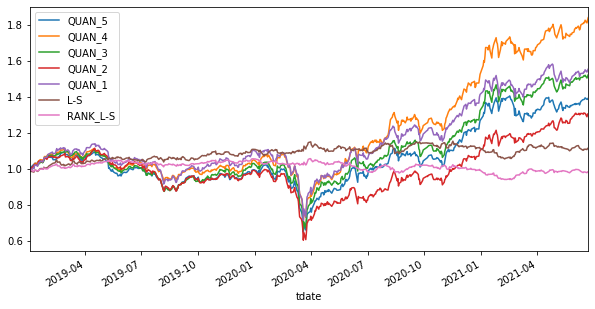

In [37]:
stra1_monthly_score = discrepancy_monthly.loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(stra1_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

#### 전체 ETF 126개 중 67개가 해외 또는 선물 또는 지수인버스 라서, 주식ratio로 nav 못 구함
#### 괴리율이 말도 안 되게 -80 수준임...
개선사항   
1) 현금 가격에 1 부여  
2) NAV 구하는 공식 다시 보기. (비율times주식현재가)로 구하고 있는데 이게 맞나..?  
    --> 틀린듯! 기준가격 구하려면 ETF설정단위(수량)와 ETF의 날짜별 각 주식 보유수량을 알아야하는데...
    --> 그럴바엔 그냥 괴리율 크롤링이 더 빠를듯  
3) 괴리율/추적오차 직접 구해버리자
https://github.com/sharebook-kr/pykrx  2.2 ETX API - 2.2.1.5 & 2.2.1.6
